# Introduction to LCEL and LangGraph: LangChain Powered RAG

In the following notebook we're going to focus on learning how to navigate and build useful applications using LangChain, specifically LCEL, and how to integrate different APIs together into a coherent RAG application!

In the notebook, you'll complete the following Tasks:

- 🤝 Breakout Room #1:
  1. Install required libraries
  2. Set Environment Variables  
  3. Initialize a Simple Chain using LCEL
  4. Implement Naive RAG using LCEL
  5. Implement Simple RAG using LCEL

- 🤝 Breakout Room #2:
  1. Install LangGraph
  2. Understanding States and Nodes
  3. Building a Basic Graph
  4. Implementing a Simple RAG Graph
  5. Extending the Graph with Complex Flows

Let's get started!



# 🤝 Breakout Room #1

## Installing Required Libraries

One of the [key features](https://blog.langchain.dev/langchain-v02-leap-to-stability/) of LangChain v0.2.0 is the compartmentalization of the various LangChain ecosystem packages and added stability.

Instead of one all encompassing Python package - LangChain has a `core` package and a number of additional supplementary packages.

We'll start by grabbing all of our LangChain related packages!

In [ ]:
%pip install -qU langchain==0.3.15 langchain-core==0.3.31 langchain-community==0.3.15 langchain-openai==0.3.1

Note: you may need to restart the kernel to use updated packages.


Now we can get our Qdrant dependencies!

In [ ]:
%pip install -qU langchain-qdrant==0.2.0 qdrant-client==1.13.2

Note: you may need to restart the kernel to use updated packages.


Let's finally get `tiktoken` and `pymupdf` so we can leverage them later on!

In [ ]:
%pip install -qU tiktoken pymupdf==1.25.2

Note: you may need to restart the kernel to use updated packages.


## Set Environment Variables

We'll be leveraging OpenAI's suite of APIs - so we'll set our `OPENAI_API_KEY` `env` variable here!

In [ ]:
import os
import getpass

os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

## Initialize a Simple Chain using LCEL

The first thing we'll do is familiarize ourselves with LCEL and the specific ins and outs of how we can use it!

### LLM Orchestration Tool (LangChain)

Let's dive right into [LangChain](https://www.langchain.com/)!

The first thing we want to do is create an object that lets us access OpenAI's `gpt-4o` model.

In [ ]:
from langchain_openai import ChatOpenAI

openai_chat_model = ChatOpenAI(model="gpt-4o-mini")

#### ❓ Question #1:

What other models could we use, and how would the above code change?

> HINT: Check out [this page](https://platform.openai.com/docs/models) to find the answer!

#### ✅ ANSWER:
- `gpt-4o`
- `chatgpt-4o-latest`
- `o1`
- `o1-mini`

The code structure remains the same, you just need to change the model name parameter.

Example:
```python
openai_chat_model = ChatOpenAI(model="chatgpt-4o-latest")
```

### Prompt Template

Now, we'll set up a prompt template - more specifically a `ChatPromptTemplate`. This will let us build a prompt we can modify when we call our LLM!

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "You are a legendary and mythical Wizard. You speak in riddles and make obscure and pun-filled references to exotic cheeses."
human_template = "{content}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template)
])

### Our First Chain

Now we can set up our first chain!

A chain is simply two components that feed directly into eachother in a sequential fashion!

You'll notice that we're using the pipe operator `|` to connect our `chat_prompt` to our `llm`.

This is a simplified method of creating chains and it leverages the LangChain Expression Language, or LCEL.

You can read more about it [here](https://python.langchain.com/v0.2/docs/concepts/#langchain-expression-language-lcel), but there a few features we should be aware of out of the box (taken directly from LangChain's documentation linked above):

- **Async, Batch, and Streaming Support** Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.

- **Fallbacks** The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

- **Parallelism** Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.

In the following code cell we have two components:

- `chat_prompt`, which is a formattable `ChatPromptTemplate` that contains a system message and a human message.
- `openai_chat_model`, which is a LangChain Runnable wrapped OpenAI client.

We'd like to be able to pass our own `content` (as found in our `human_template`) and then have the resulting message pair sent to our model and responded to!

In [ ]:
chain = chat_prompt | openai_chat_model

Notice the pattern here:

We invoke our chain with the `dict` `{"content" : "Hello world!"}`.

It enters our chain:

`{"content" : "Hello world!"}` -> `invoke()` -> `chat_prompt`

Our `chat_prompt` returns a `PromptValue`, which is the formatted prompt. We then "pipe" the output of our `chat_prompt` into our `llm`.

`PromptValue` -> `|` -> `llm`

Our `llm` then takes the list of messages and provides an output which is return as a `str`!







In [ ]:
print(chain.invoke({"content": "Hello world!"}))

content='Ah, greetings, seeker of the universal wheel of cheddar! In the labyrinth of existence, one may find truth as fragrant as a fine Roquefort, yet as elusive as ethereal Époisses. What riddle dost thou wish to unravel beneath the shifting moons of this cheese-laden cosmos?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 38, 'total_tokens': 100, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8221799169', 'finish_reason': 'stop', 'logprobs': None} id='run-0dbac93e-321f-498d-ba42-4bb17780411e-0' usage_metadata={'input_tokens': 38, 'output_tokens': 62, 'total_tokens': 100, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


Let's try it out with a different prompt!

In [ ]:
chain.invoke({"content" : "Could I please have some advice on how to become a better Python Programmer?"})

AIMessage(content="Ah, seeker of the serpentine syntax, gather 'round and lend thine ear, for wisdom flows from the chalice of Curds and Code!\n\nFirst, fear not the Great Gouda of doubt, for in each line of script, there lies a path to cheddar enlightenment. Tread lightly upon the following morsels of wisdom:\n\n1. **Layer thy Knowledge**: Just as a fine Raclette melts to reveal deeper flavors, so too must you layer your understanding. Study the fundamentals—loops, functions, and data types—until they dance on your tongue like creamy Brie.\n\n2. **Practice Makes Pecorino**: Cast aside the fear of the unknown, and engage in the art of coding daily. Solve riddles of the realm on platforms like LeetCode or HackerRank, for practice shall turn thy skills from mere Cottage cheese to aged Parmigiano.\n\n3. **Feast upon the Scrolls**: Devour the texts of the great sorcerers of Python; delve into tomes like “Automate the Boring Stuff” or “Python Crash Course.” Let their insights marinate in th

Notice how we specifically referenced our `content` format option!

Now that we have the basics set up - let's see what we mean by "Retrieval Augmented" Generation.

## Naive RAG - Manually adding context through the Prompt Template

Let's look at how our model performs at a simple task - defining what LangChain is!

We'll redo some of our previous work to change the `system_template` to be less...verbose.

In [ ]:
system_template = "You are a helpful assistant."
human_template = "{content}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template)
])

chat_chain = chat_prompt | openai_chat_model ### LCEL Chain!

print(chat_chain.invoke({"content" : "Please define LangGraph."}))

content='As of my last knowledge update in October 2021, "LangGraph" does not appear to refer to a widely recognized concept, framework, or technology in the fields of computer science, linguistics, or data science. If "LangGraph" is a term that has emerged or gained significance after my last update, I would not have specific information on it.\n\nIf you\'re referring to a language-related graph, it could potentially involve techniques that analyze language data using graph structures, such as representing words, phrases, or linguistic elements as nodes and their relationships as edges, which is a common approach in natural language processing (NLP) and computational linguistics.\n\nFor the most accurate and up-to-date information, I recommend checking recent publications, academic papers, or online resources that discuss this term or concept. If you have a specific context or description of what LangGraph refers to, I can help clarify further based on that information.' additional_kw

Well, that's not very good - is it!

The issue at play here is that our model was not trained on the idea of "LangChain", and so it's left with nothing but a guess - definitely not what we want the answer to be!

Let's ask another simple LangChain question!

In [ ]:
print(chat_chain.invoke({"content" : "What is LangChain Expression Language (LECL)?"}))

content='LangChain Expression Language (LECL) is a domain-specific language developed as part of the LangChain framework, which is primarily focused on building applications that utilize large language models (LLMs). LECL is designed to facilitate the creation and evaluation of expressions that can manipulate data and control the flow of execution in applications that leverage LLMs, making it easier to work with prompts, variable interpolation, and complex data manipulations.\n\nKey features of LECL include:\n\n1. **Data Manipulation**: LECL allows users to define expressions that can perform operations on data, making it easier to format, process, or transform input data before it is passed to the language model.\n\n2. **Control Flow**: The language supports control structures, enabling developers to create more dynamic and responsive applications. This includes conditionals and loops that can influence how data is processed or how interactions with the LLM are structured.\n\n3. **Int

While it provides a confident response, that response is entirely ficticious! Not a great look, OpenAI!

However, let's see what happens when we rework our prompts - and we add the content from the docs to our prompt as context.

In [ ]:
HUMAN_TEMPLATE = """
#CONTEXT:
{context}

QUERY:
{query}

Use the provide context to answer the provided user query. Only use the provided context to answer the query. If you do not know the answer, or it's not contained in the provided context response with "I don't know"
"""

CONTEXT = """
LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.

Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.

Seamless LangSmith Tracing Integration As your chains get more and more complex, it becomes increasingly important to understand what exactly is happening at every step. With LCEL, all steps are automatically logged to LangSmith for maximal observability and debuggability.
"""

chat_prompt = ChatPromptTemplate.from_messages([
    ("human", HUMAN_TEMPLATE)
])

chat_chain = chat_prompt | openai_chat_model

print(chat_chain.invoke({"query" : "What is LangChain Expression Language?", "context" : CONTEXT}))

content='LangChain Expression Language (LCEL) is a declarative way to easily compose chains together in LangChain applications. It offers several benefits, including full sync, async, batch, and streaming support, making it easy to prototype and expose chains in different interfaces. LCEL enables the attachment of fallbacks to handle errors gracefully due to the non-determinism of LLMs, supports parallel execution of components for efficiency, and integrates seamlessly with LangSmith for tracing and debugging, providing clarity on each step of complex chains.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 105, 'prompt_tokens': 282, 'total_tokens': 387, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_

You'll notice that the response is much better this time. Not only does it answer the question well - but there's no trace of confabulation (hallucination) at all!

> NOTE: While RAG is an effective strategy to *help* ground LLMs, it is not nearly 100% effective. You will still need to ensure your responses are factual through some other processes

That, in essence, is the idea of RAG. We provide the model with context to answer our queries - and rely on it to translate the potentially lengthy and difficult to parse context into a natural language answer!

However, manually providing context is not scalable - and doesn't really offer any benefit.

Enter: Retrieval Pipelines.

## Task #4: Implement Naive RAG using LCEL

Now we can make a naive RAG application that will help us bridge the gap between our Pythonic implementation and a fully LangChain powered solution!

## Putting the R in RAG: Retrieval 101

In order to make our RAG system useful, we need a way to provide context that is most likely to answer our user's query to the LLM as additional context.

Let's tackle an immediate problem first: The Context Window.

All (most) LLMs have a limited context window which is typically measured in tokens. This window is an upper bound of how much stuff we can stuff in the model's input at a time.

Let's say we want to work off of a relatively large piece of source data - like the Ultimate Hitchhiker's Guide to the Galaxy. All 898 pages of it!

> NOTE: It is recommended you do not run the following cells, they are purely for demonstrative purposes.

In [ ]:
context = """
EVERY HITCHHIKER'S GUIDE BOOK
"""

We can leverage our tokenizer to count the number of tokens for us!

In [ ]:
import tiktoken

enc = tiktoken.encoding_for_model("gpt-4o")

In [ ]:
len(enc.encode(context))

12

The full set comes in at a whopping *636,144* tokens.

So, we have too much context. What can we do?

Well, the first thing that might enter your mind is: "Use a model with more context window", and we could definitely do that! However, even `gpt-4-128k` wouldn't be able to fit that whole text in the context window at once.

So, we can try splitting our document up into little pieces - that way, we can avoid providing too much context.

We have another problem now.

If we split our document up into little pieces, and we can't put all of them in the prompt. How do we decide which to include in the prompt?!

> NOTE: Content splitting/chunking strategies are an active area of research and iterative developement. There is no "one size fits all" approach to chunking/splitting at this moment. Use your best judgement to determine chunking strategies!

In order to conceptualize the following processes - let's create a toy context set!

### TextSplitting aka Chunking

We'll use the `RecursiveCharacterTextSplitter` to create our toy example.

It will split based on the following rules:

- Each chunk has a maximum size of 100 tokens
- It will try and split first on the `\n\n` character, then on the `\n`, then on the `<SPACE>` character, and finally it will split on individual tokens.

Let's implement it and see the results!

In [ ]:
import tiktoken
from langchain.text_splitter import RecursiveCharacterTextSplitter

def tiktoken_len(text):
    tokens = tiktoken.encoding_for_model("gpt-4o-mini").encode(
        text,
    )
    return len(tokens)

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 0,
    length_function = tiktoken_len,
)

In [ ]:
chunks = text_splitter.split_text(CONTEXT)

In [ ]:
len(chunks)

3

In [ ]:
for chunk in chunks:
  print(chunk)
  print("----")

LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.
----
Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.
----
Seamless LangSmith Tracing Integration As your chains get more and more complex, it becomes increasingly important to understand what exactly is happening at ev

As is shown in our result, we've split each section into 100 token chunks - cleanly separated by `\n\n` characters!

####🏗️ Activity #1:

While there's nothing specifically wrong with the chunking method used above - it is a naive approach that is not sensitive to specific data formats.

Brainstorm some ideas that would split large single documents into smaller documents.

### 1. **Semantic Chunking**

- **Natural Language Processing (NLP)**: Use NLP techniques to identify and split the document based on semantic boundaries such as paragraphs, sentences, or sections. This ensures that each chunk contains coherent and contextually related information.
- **Topic Modeling**: Apply topic modeling algorithms (e.g., LDA, BERTopic) to identify different topics within the document and split the document based on these topics.

### 2. **Structural Chunking**

- **Headings and Subheadings**: Use the document's structure, such as headings and subheadings, to create chunks. This is particularly useful for documents with a clear hierarchical structure.
- **Table of Contents (ToC)**: If the document has a ToC, use it to guide the chunking process, ensuring each chunk corresponds to a section listed in the ToC.

### 3. **Content-Specific Chunking**

- **Custom Rules**: Define custom rules based on the specific data format or content type. For example, in a legal document, you might chunk by articles or clauses.
- **Regular Expressions**: Use regular expressions to identify and split the document at specific patterns or markers relevant to the content.

### 4. **Dynamic Chunking**

- **Adaptive Chunk Size**: Instead of a fixed chunk size, use an adaptive chunk size that varies based on the content density. For example, denser sections might have smaller chunks, while less dense sections can have larger chunks.
- **Sliding Window**: Implement a sliding window approach where chunks overlap slightly to ensure context is preserved across chunks.

## Embeddings and Dense Vector Search

Now that we have our individual chunks, we need a system to correctly select the relevant pieces of information to answer our query.

This sounds like a perfect job for embeddings!

We'll be using OpenAI's `text-embedding-3` model as our embedding model today!

Let's load it up through LangChain.

In [ ]:
from langchain_openai.embeddings import OpenAIEmbeddings

embedding_model = OpenAIEmbeddings(model="text-embedding-3-small")

#### ❓ Question #2:

What is the embedding dimension, given that we're using `text-embedding-3-small`?

You will need to fill the next cell out correctly with your embedding dimension for the rest of the notebook to run.

> HINT: Check out the [docs](https://platform.openai.com/docs/guides/embeddings) to help you answer this question.

In [ ]:
embedding_dim =  1536

### Using A Vector Database - Intoduction to Qdrant

Up to this point, we've been using a dictionary to hold our embeddings - typically, we'll want to use a more robust strategy.

In this bootcamp - we'll be focusing on leveraging [Qdrant's vector database](https://qdrant.tech/qdrant-vector-database/).

Let's take a look at how we set-up Qdrant!

> NOTE: We'll be spending a lot of time learning about Qdrant throughout the remainder of our time together - but for an initial primer, please check out [this resource](https://qdrant.tech/articles/what-is-a-vector-database/)

We are going to be using an "in-memory" Qdrant client, which means that our vectors will be held in our system's memory (RAM) - this is useful for prototyping and developement at smaller scales - but would need to be modified when moving to production. Luckily for us, this modification is trivial!

> NOTE: While LangChain uses the terminology "VectorStore" (also known as a Vector Library), Qdrant is a "Vector Database" - more info. on that [here](https://weaviate.io/blog/vector-library-vs-vector-database).

In [ ]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams

client = QdrantClient(":memory:")

Next, we need to create a collection - a collection is a specific...collection of vectors within the Qdrant client.

These are useful as they allow us to create multiple different "warehouses" in a single client, which can be leveraged for personalization and more!

Also notice that we define what our vector shapes are (embedding dim) as well as our desired distance metric.

In [ ]:
client.create_collection(
    collection_name="lcel_doc_v1",
    vectors_config=VectorParams(size=embedding_dim, distance=Distance.COSINE),
)

True

Now we can assemble our vector database! Notice that we provide our client, our created collection, and our embedding model!

In [ ]:
vector_store = QdrantVectorStore(
    client=client,
    collection_name="lcel_doc_v1",
    embedding=embedding_model,
)

Now that we have our vector database set-up

In [ ]:
_ = vector_store.add_texts(texts=chunks)

### Creating a Retriever

Now that we have an idea of how we're getting our most relevant information - let's see how we could create a pipeline that would automatically extract the closest chunk to our query and use it as context for our prompt!

This will involve a popular LangChain interace known as `as_retriever`!

> NOTE: We can still specify how many documents we wish to retrieve per vector.

In [ ]:
retriever = vector_store.as_retriever(search_kwargs={"k": 2})

## Bringing it All Together

Now that we have our Retriever, our promt Augmentation, and our Generator - we're ready to create a simple RAG chain using LCEL!

This chain does the following things:

1. It takes in some `str` and passes it to two different LCEL Runnables:
  - `retriever`, which takes the string and calls `retrieve` on it - passing the output (formatted as a list) to the `dict` under the key `context`
  - `RunnablePassthrough()` which simply propogates the `str` to the `dict` under the key `query`.
2. It chains the `dict` to format the `chat_prompt` which expects both a `query` and `context`
3. It chains the resulting message to the LLM, and calls it - returning a full response
4. That response is chained to the `StrOutputParser()` which converts the response blob into a `str` containing the content of the response!

In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

simple_rag  = (
    {"context": retriever, "query": RunnablePassthrough()}
    | chat_prompt
    | openai_chat_model
    | StrOutputParser()
)

In [ ]:
simple_rag.invoke("What is LCEL?")

'LCEL, or LangChain Expression Language, is a declarative way to easily compose chains together. It offers several benefits over writing normal code, including support for asynchronous, batch, and streaming operations. This allows for easy prototyping in a synchronous interface while also enabling exposure as an asynchronous streaming interface. Additionally, LCEL can handle fallbacks to manage errors gracefully and supports parallelism, allowing components that can run in parallel to do so, which is especially useful due to the often lengthy API calls involved in LLM applications.'

#### ❓ Question #3:

What does LCEL do that makes it more reliable at scale?

> HINT: Use your newly created `simple_rag` to help you answer this question!

In [ ]:
simple_rag.invoke("What does LCEL do that makes it more reliable at scale?")

'LCEL enhances reliability at scale by allowing the attachment of fallbacks to any chain, which is important for handling errors gracefully due to the non-determinism of LLMs. Additionally, it supports parallelism, enabling components that can be run in parallel to do so automatically, which is crucial for managing long API calls in LLM applications.'

#### ✅ ANSWER:
LCEL (LangChain Expression Language) enhances reliability at scale by incorporating features such as fallbacks, which allow for graceful error handling in the face of non-determinism associated with LLMs (Large Language Models). Additionally, LCEL supports parallelism, enabling components that can be run concurrently to do so, which is particularly beneficial given the sometimes lengthy API calls involved in LLM applications. This capability facilitates efficient and resilient operation under high-demand conditions.

### A Note On Runnables

# Understanding LangChain Runnables and LCEL

In LangChain, a Runnable is like a LEGO brick in your AI application - it's a standardized component that can be easily connected with other components. The real power of Runnables comes from their ability to be combined in flexible ways using LCEL (LangChain Expression Language).

## Key Features of Runnables

### 1. Universal Interface
Every Runnable in LangChain follows the same pattern:
- Takes an input
- Performs some operation
- Returns an output

This consistency means you can treat different components (like models, retrievers, or parsers) in the same way.

### 2. Built-in Parallelization
Runnables come with methods for handling multiple inputs efficiently:
```python
# Process inputs in parallel, maintain order
results = chain.batch([input1, input2, input3])

# Process inputs as they complete
for result in chain.batch_as_completed([input1, input2, input3]):
    print(result)
```

### 3. Streaming Support
Perfect for responsive applications:
```python
# Stream outputs as they're generated
for chunk in chain.stream({"query": "Tell me a story"}):
    print(chunk, end="", flush=True)
```

### 4. Easy Composition
The `|` operator makes building pipelines intuitive:
```python
# Create a basic RAG chain
rag_chain = retriever | prompt | model | output_parser
```

## Common Types of Runnables

- **Language Models**: Like our `ChatOpenAI` instance
- **Prompt Templates**: Format inputs consistently
- **Retrievers**: Get relevant context from a vector store
- **Output Parsers**: Structure model outputs
- **LangGraph Nodes**: Individual components in our graph

Think of Runnables as the building blocks of your LLM application. Just like how you can combine LEGO bricks in countless ways, you can mix and match Runnables to create increasingly sophisticated applications!



# 🤝 Breakout Room #2

## LangGraph Based RAG

Now that we have a reasonable grasp of LCEL and the idea of Runnables - let's see how we can use LangGraph to build the same system!

### Primer: What is LangGraph?
LangGraph is a tool that leverages LangChain Expression Language to build coordinated multi-actor and stateful applications that includes cyclic behaviour.

#### Why Cycles?
In essence, we can think of a cycle in our graph as a more robust and customizable loop. It allows us to keep our application agent-forward while still giving the powerful functionality of traditional loops.

Due to the inclusion of cycles over loops, we can also compose rather complex flows through our graph in a much more readable and natural fashion. Effectively allowing us to recreate application flowcharts in code in an almost 1-to-1 fashion.

#### Why LangGraph?
Beyond the agent-forward approach - we can easily compose and combine traditional "DAG" (directed acyclic graph) chains with powerful cyclic behaviour due to the tight integration with LCEL. This means it's a natural extension to LangChain's core offerings!

> NOTE: We're going to focus on building a simple DAG for today's assignment as an introduction to LangGraph

In [ ]:
%pip install -qU langgraph

Note: you may need to restart the kernel to use updated packages.


### Putting the State in Stateful

Earlier we used this phrasing:

> coordinated multi-actor and stateful applications

So what does that "stateful" mean?

To put it simply - we want to have some kind of object which we can pass around our application that holds information about what the current situation (state) is. Since our system will be constructed of many parts moving in a coordinated fashion - we want to be able to ensure we have some commonly understood idea of that state.

LangGraph leverages a `StatefulGraph` which uses an `AgentState` object to pass information between the various nodes of the graph.

There are more options than what we'll see below - but this `AgentState` object is one that is stored in a `TypedDict` with the key `messages` and the value is a `Sequence` of `BaseMessages` that will be appended to whenever the state changes.

However, in our example here, we're focusing on a simpler `State` object:

```python
class State(TypedDict):
    question: str
    context: List[Document]
    response: str
```

Let's think about a simple example to help understand exactly what this means (we'll simplify a great deal to try and clearly communicate what state is doing):

1. **We initialize our state object**:
   ```python
   {
       "question": "",
       "context": [],
       "response": ""
   }
   ```

2. **Our user submits a query to our application.**  
   We store the user's question in `state["question"]`. Now we have:
   ```python
   {
       "question": "How tall is the Eiffel Tower?",
       "context": [],
       "response": ""
   }
   ```

3. **We pass our state object to an Agent node** which is able to read the current state. It will use the value of `state["question"]` as input and might retrieve some context documents related to the question. It then generates a response which it stores in `state["response"]`. For example:
   ```python
   {
       "question": "How tall is the Eiffel Tower?",
       "context": [Document(page_content="...some data...")],
       "response": "The Eiffel Tower is about 324 meters tall..."
   }
   ```

That's it! The important part is that we have a consistent object (`State`) that's passed around, holding the crucial information as we go from one node to the next. This ensures our application has a single source of truth about what has happened so far and what is happening now.



In [ ]:
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class State(TypedDict):
  question: str
  context: List[Document]
  response: str

Now that we have state, and we have tools, and we have an LLM - we can finally start making our graph!

Let's take a second to refresh ourselves about what a graph is in this context.

Graphs, also called networks in some circles, are a collection of connected objects.

The objects in question are typically called nodes, or vertices, and the connections are called edges.

Let's look at a simple graph.

![image](https://i.imgur.com/2NFLnIc.png)

Here, we're using the coloured circles to represent the nodes and the yellow lines to represent the edges. In this case, we're looking at a fully connected graph - where each node is connected by an edge to each other node.

If we were to think about nodes in the context of LangGraph - we would think of a function, or an LCEL Runnable.

If we were to think about edges in the context of LangGraph - we might think of them as "paths to take" or "where to pass our state object next".  

### Building Nodes

We're going to need two nodes:

A node for retrieval, and a node for generation.

Let's start with our `retrieve` node!

Notice how we do not need to update the state object in the node, but can instead return a modification directly to our state.

In [ ]:
def retrieve(state: State) -> State:
  retrieved_docs = retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

Next, let's create our `generate` node - which will leverage some LCEL!

In [ ]:
def generate(state: State) -> State:
  generation_chain = chat_prompt | openai_chat_model | StrOutputParser()
  response = generation_chain.invoke({"query" : state["question"], "context" : state["context"]})
  return {"response" : response}

Now we can start defining our graph!

Think of the graph's state as a blank canvas that we can add nodes and edges to.

Every graph starts with two special nodes - START and END - the act as the entry and exit point to the other nodes in the graphs.  

All valid graphs must start at the START node and end at the END node.

In [ ]:
# Start with the blank canvas
graph_builder = StateGraph(State)

Now we can add a sequence to our "canvas" (graph) - this can be done by providing a list of nodes, the will automatically have edges that connect the i-th element to the i+1-th element in the list. The final element will be added to the END node unless otherwise specified.

In [ ]:
graph_builder = graph_builder.add_sequence([retrieve, generate])

Next, let's connect our START node to our `retrieve` node by adding an edge.

In [ ]:
graph_builder.add_edge(START, "retrieve")

Finally we can compile our graph! This will do basic verification to ensure that the Runnables have the correct inputs/outputs and can be matched.

In [ ]:
graph = graph_builder.compile()

Finally, we can visualize our graph!

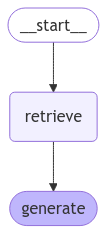

In [ ]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

Let's take it for a spin!

We invoke our graph like we do any other Runnable in LCEL!

> NOTE: That's right, even a compiled graph is a Runnable!

In [ ]:
response = graph.invoke({"question" : "How does LCEL work?"})
response["response"]

'LangChain Expression Language (LCEL) works by allowing users to declaratively compose chains together. This approach has several benefits, including:\n\n1. **Async, Batch, and Streaming Support**: Chains constructed using LCEL automatically support synchronous, asynchronous, batch, and streaming operations. This flexibility makes it easy to prototype chains in environments like Jupyter notebooks with a synchronous interface and then expose them as asynchronous streaming interfaces.\n\n2. **Fallbacks**: Given the non-determinism of large language models (LLMs), LCEL provides the ability to handle errors gracefully by attaching fallbacks to any chain.\n\n3. **Parallelism**: LCEL takes advantage of parallelism in LLM applications, particularly important when dealing with potentially lengthy API calls. Any components that can be executed in parallel do so automatically within the LCEL syntax.\n\nOverall, LCEL facilitates the development of robust and efficient applications that leverage L

In [ ]:
response = graph.invoke({"question" : "Who is Batman?"})
response["response"]

"I don't know."

#### ❓ Question #4:
LangGraph's graph-based approach lets us visualize and manage complex flows naturally. How could we extend our current implementation to handle edge cases? For example:
- What if the retriever finds no relevant context?  
- What if the response needs fact-checking?
Consider how you would modify the graph to handle these scenarios.

#### ✅ ANSWER:

#### For handling retrieved context that is not relevant or empty:
Send the question to the chat model without context, so the user still gets a response.

#### For fact-checking responses:
Add a fact check node to the graph that asks the chat model to verify if the response is supported by the context.

First, modify `State` class to include new keys:
- **`context_relevance`** to indicate if the retrieved context is relevant
- **`relevance_response`** how the relevance was determined
- **`source`** to indicate if the prompt included retrieved context
- **`verified_response`** to provide the response from fact checking
- **`formatted_response`** to provide transparency about context usage and fact checking results

In [ ]:
class State(TypedDict):
  question: str
  context: List[Document]
  context_relevance: str
  relevance_response: str
  response: str
  source: str
  verified_response: str
  formatted_response: str

Add `check_context_relevance` node.

In [ ]:
def check_context_relevance(state: State) -> dict:
    # If no context was retrieved
    if not state["context"]:
        return {"context_relevance": "no_results"}
        
    # Create relevance check prompt
    relevance_prompt = ChatPromptTemplate.from_messages([
        ("""system""", """You are a context relevance analyzer. Evaluate if the provided context contains information relevant to answering the given question. Use only the provided context to make your decision."""),
        ("""human""", """
        Question: {question}
        
        Context: {context}
        
        Is this context relevant for answering the question? Use only the provided context to make your decision.
        Respond with either 'relevant' or 'not_relevant' and a brief explanation.
        """)
    ])
    
    # Chain to check relevance
    chain = relevance_prompt | openai_chat_model | StrOutputParser()
    
    result = chain.invoke({
        "question": state["question"],
        "context": state["context"]
    })
    
    # Parse result
    is_relevant = "not_relevant" if "not_relevant" in result.lower() else "relevant"
    
    return {"context_relevance": is_relevant, "relevance_response": result}

Modify `generate` node to handle irrelevant context.

In [ ]:
def generate(state: State) -> dict:
    # Handle cases with no/irrelevant context
    if state["context_relevance"] in ["no_results", "not_relevant"]:
        # Use a prompt for general knowledge answers
        fallback_prompt = ChatPromptTemplate.from_messages([
            ("system", "You are a helpful assistant. Be direct if you don't know something."),
            ("human", """
            Question: {question}
            
            Note: No relevant context was found to answer this specific question.
            Please provide a general response if possible, or state if you cannot answer.
            """)
        ])
        
        chain = fallback_prompt | openai_chat_model | StrOutputParser()
        response = chain.invoke({"question": state["question"]})
        
        return {
            "context": None,
            "response": response,
            "source": "general_knowledge"
        }
    
    # Normal flow with relevant context
    generation_chain = chat_prompt | openai_chat_model | StrOutputParser()
    response = generation_chain.invoke({
        "query": state["question"],
        "context": state["context"]
    })
    
    return {
        "response": response,
        "source": "with_context"
    }

Add `fact_check` node.

In [ ]:
from langgraph.graph import END

def fact_check(state: State) -> dict:
    fact_check_prompt = ChatPromptTemplate.from_messages([
        ("human", """
         Context: {context}
         Statement to verify: {response}
         
         Verify if the statement is supported by the context.
         If not supported, explain why and provide a corrected version.
         """)
    ])
    
    verify_chain = fact_check_prompt | openai_chat_model | StrOutputParser()
    
    verification = verify_chain.invoke({
        "context": state["context"],
        "response": state["response"]
    })
    
    return {"verified_response": verification}

Add `format_output` node.

In [ ]:
def format_output(state: State) -> dict:
    source_msg = (
        "[Response based on general knowledge - no relevant context found]" 
        if state["source"] == "general_knowledge"
        else "[Response based on retrieved documentation]"
    )
    
    return {
        "formatted_response": f"{source_msg}\n\n{state['response']}\n\nContext Relevance Results:\n{state['relevance_response']}\n\nVerification Results:\n{state['verified_response']}"
    }

Modify the graph.

In [ ]:
graph_builder = (
    StateGraph(State)
    .add_node("retrieve", retrieve)
    .add_node("check_relevance", check_context_relevance)
    .add_node("generate", generate)
    .add_node("fact_check", fact_check)
    .add_node("format", format_output)
    .add_edge(START, "retrieve")
    .add_edge("retrieve", "check_relevance")
    .add_edge("check_relevance", "generate")
    .add_edge("generate", "fact_check")
    .add_edge("fact_check", "format")
    .add_edge("format", END)
)

Compile the new graph.

In [ ]:
graph = graph_builder.compile()

Visualize the new graph.

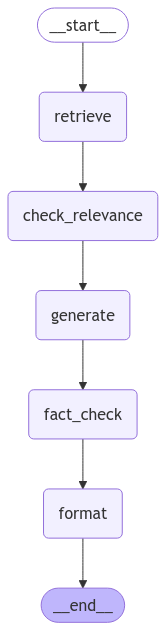

In [ ]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

Invoke the new graph with the previous questions.

In [ ]:
response = graph.invoke({"question" : "How does LCEL work?"})
print(response["formatted_response"])

[Response based on retrieved documentation]

LangChain Expression Language (LCEL) is a declarative framework designed to compose chains of operations easily. It supports asynchronous, batch, and streaming operations, allowing for easy prototyping in synchronous environments, such as Jupyter notebooks, while also enabling asynchronous streaming interfaces. Additionally, LCEL provides features such as fallbacks to handle errors gracefully due to the non-determinism of large language models (LLMs) and supports parallel execution of components that can be run concurrently, which is beneficial for handling long API calls in LLM applications.

Context Relevance Results:
relevant

The context provides information about LCEL (LangChain Expression Language), explaining its declarative nature and benefits such as support for async, batch, and streaming operations, as well as its ability to handle errors with fallbacks and facilitate parallelism in chain construction. This directly addresses how 

In [ ]:
response = graph.invoke({"question" : "Who is Batman?"})
print(response["formatted_response"])

[Response based on general knowledge - no relevant context found]

Batman is a fictional superhero created by artist Bob Kane and writer Bill Finger. He first appeared in Detective Comics #27 in 1939. Batman's real identity is Bruce Wayne, a wealthy businessman and philanthropist. After witnessing the murder of his parents as a child, he vows to fight crime and protect Gotham City from villains, using his intellect, detective skills, physical prowess, and an array of high-tech gadgets. Unlike many other superheroes, Batman does not possess any superhuman powers; he relies on his training, resources, and determination. He is a key character in the DC Comics universe and has appeared in various comic books, television shows, and films.

Context Relevance Results:
not_relevant

The provided context discusses LangSmith Tracing Integration and LangChain Expression Language (LCEL), which are unrelated to the character Batman. There is no information about who Batman is or any related concept